In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<h1>Examining dataset</h1>

In [2]:
# Creating dataframe from training set CSV
training_df = pd.read_csv("Assignment3-Healthcare-Dataset.csv")

In [3]:
# Head
training_df.head(20)

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,PROTESTANT QUAKER,DIVORCED,WHITE,...,4,0,5,15,7,4,399,0,494,NaN
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,NOT SPECIFIED,SINGLE,WHITE,...,5,6,5,7,4,5,373,0,466,NaN
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,JEWISH,MARRIED,WHITE,...,5,1,9,12,0,7,526,0,603,NaN
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,CATHOLIC,MARRIED,WHITE,...,3,2,16,25,14,10,555,0,680,NaN
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,EPISCOPALIAN,MARRIED,WHITE,...,0,0,8,9,5,4,449,0,509,NaN
5,M,21.0,14,1,CLINIC REFERRAL/PREMATURE,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,1,NOT SPECIFIED,SINGLE,HISPANIC OR LATINO,...,26,3,18,10,57,3,1337,0,1483,NaN
6,M,67.0,10,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,2,CATHOLIC,MARRIED,WHITE,...,3,2,15,14,23,6,524,0,618,NaN
7,F,49.0,1,0,PHYS REFERRAL/NORMAL DELI,RIGHT SHOULDER ADHESIVE CAPSULITIS/SDA,1,CATHOLIC,SINGLE,WHITE,...,0,0,0,0,0,5,0,0,25,NaN
8,M,27.0,1,3,TRANSFER FROM HOSP/EXTRAM,OVERDOSE,1,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,...,0,16,7,0,0,3,648,0,783,NaN
9,M,55.0,8,0,PHYS REFERRAL/NORMAL DELI,HERNIATED DISC/SDA,3,PROTESTANT QUAKER,MARRIED,WHITE,...,3,7,10,12,16,4,729,0,852,NaN


<b>Comment:</b>
- religion: doesn't seem like it'll be relevant given the presence of newborns who don't choose their own religion. also assuming expiry is treatment/biology related, we should drop this feature.
- marital_status: similar reasons to above, this is likely irrelvant, thus we should drop thi too.
- LOSgroupNum: mostly NaN values. Description says this is "Group number based on the length of stay.". Doesn't seem relevant.

In [4]:
# Features we are working with
print(training_df.columns)

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')


In [5]:
# Data types of each column
training_df.dtypes

gender               object
age                 float64
LOSdays               int64
admit_type            int64
admit_location       object
AdmitDiagnosis       object
insurance             int64
religion             object
marital_status       object
ethnicity            object
NumCallouts         float64
NumDiagnosis          int64
NumProcs              int64
AdmitProcedure       object
NumCPTevents          int64
NumInput              int64
NumLabs               int64
NumMicroLabs          int64
NumNotes              int64
NumOutput             int64
NumRx                 int64
NumProcEvents         int64
NumTransfers          int64
NumChartEvents        int64
ExpiredHospital       int64
TotalNumInteract      int64
LOSgroupNum         float64
dtype: object

In [6]:
# Shape of our dataset
print(training_df.shape)

(47180, 27)


Comment: 
27 columns and 47,180 rows

In [7]:
# Null values in our dataset
training_df.isna().sum()

gender                  0
age                  2339
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         20
insurance               0
religion              372
marital_status       8179
ethnicity               0
NumCallouts          2370
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum         42447
dtype: int64

</b>Comment:</b>
89.96% of the records have an NA LOSgroupNum value.



In [8]:
# Get descriptive statistics
desc_stats = training_df.describe()

# Including median in the descriptive statistics
medians = training_df.median()
desc_stats.loc['median'] = medians

print(desc_stats)

                 age       LOSdays    admit_type     insurance   NumCallouts  \
count   44841.000000  47180.000000  47180.000000  47180.000000  44810.000000   
mean       52.930354     10.164922      1.049152      2.240547      0.583620   
std        26.101224     12.559196      0.593867      0.766090      0.703098   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%        43.000000      4.000000      1.000000      2.000000      0.000000   
50%        59.000000      6.000000      1.000000      2.000000      0.000000   
75%        73.000000     12.000000      1.000000      3.000000      1.000000   
max        89.000000    295.000000      3.000000      4.000000      7.000000   
median     59.000000      6.000000      1.000000      2.000000      0.000000   

        NumDiagnosis      NumProcs  NumCPTevents      NumInput       NumLabs  \
count   47180.000000  47180.000000  47180.000000  47180.000000  47180.000000   
mean       12.023696      4.042900     

C:\Users\elena\AppData\Local\Temp\ipykernel_19648\2569437262.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = training_df.median()


<h1>Cleaning Dataset</h1>

Dropped Columns:
- religion
- marital status
- LOSgroupNum

In [9]:
cleaning_df = training_df[['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 
       #'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 
       #'LOSgroupNum'
       ]].copy()

cleaning_df

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,ethnicity,NumCallouts,NumDiagnosis,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,WHITE,1.0,16,...,43,4,0,5,15,7,4,399,0,494
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,WHITE,1.0,9,...,56,5,6,5,7,4,5,373,0,466
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,WHITE,3.0,5,...,32,5,1,9,12,0,7,526,0,603
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,WHITE,0.0,18,...,51,3,2,16,25,14,10,555,0,680
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,WHITE,1.0,5,...,31,0,0,8,9,5,4,449,0,509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,M,74.0,36,0,PHYS REFERRAL/NORMAL DELI,RECTAL CANCER/SDA,2,WHITE,0.0,9,...,21,30,1,2,3,0,6,57,0,89
47176,F,85.0,3,1,TRANSFER FROM HOSP/EXTRAM,BRADYCARDIA,2,WHITE,1.0,16,...,51,8,1,5,14,3,4,358,0,447
47177,M,60.0,25,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,UNKNOWN/NOT SPECIFIED,0.0,9,...,67,5,3,23,8,0,2,1315,0,1746
47178,M,23.0,17,1,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,3,WHITE,0.0,10,...,27,9,2,6,6,0,6,207,0,261


In [10]:
cleaning_df.shape

(47180, 24)

In [11]:
# Null values in our dataset
cleaning_df.isna().sum()

gender                 0
age                 2339
LOSdays                0
admit_type             0
admit_location         0
AdmitDiagnosis        20
insurance              0
ethnicity              0
NumCallouts         2370
NumDiagnosis           0
NumProcs               0
AdmitProcedure         0
NumCPTevents           0
NumInput               0
NumLabs                0
NumMicroLabs           0
NumNotes               0
NumOutput              0
NumRx                  0
NumProcEvents          0
NumTransfers           0
NumChartEvents         0
ExpiredHospital        0
TotalNumInteract       0
dtype: int64

In [12]:
# 4.95% of records missing age
# 0.04% of records missing AdmitDiagnosis
# 5.02% of records missing NumCallouts

# Should be safe to drop these as they are extremely insignificant

In [13]:
# Drop na rows
cleaning_df = cleaning_df.dropna()

# Show number of na
cleaning_df.isna().sum()

gender              0
age                 0
LOSdays             0
admit_type          0
admit_location      0
AdmitDiagnosis      0
insurance           0
ethnicity           0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
AdmitProcedure      0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumNotes            0
NumOutput           0
NumRx               0
NumProcEvents       0
NumTransfers        0
NumChartEvents      0
ExpiredHospital     0
TotalNumInteract    0
dtype: int64

In [14]:
# Shape
cleaning_df.shape

(42594, 24)

<h1>Exploring Cleaned Dataset</h1>

In [15]:
# For sake of naming convention, lets set a new name for our cleaned
# dataset

cleaned_df = cleaning_df.copy()

cleaned_df.head(10)

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,ethnicity,NumCallouts,NumDiagnosis,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,WHITE,1.0,16,...,43,4,0,5,15,7,4,399,0,494
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,WHITE,1.0,9,...,56,5,6,5,7,4,5,373,0,466
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,WHITE,3.0,5,...,32,5,1,9,12,0,7,526,0,603
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,WHITE,0.0,18,...,51,3,2,16,25,14,10,555,0,680
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,WHITE,1.0,5,...,31,0,0,8,9,5,4,449,0,509
5,M,21.0,14,1,CLINIC REFERRAL/PREMATURE,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,1,HISPANIC OR LATINO,1.0,14,...,43,26,3,18,10,57,3,1337,0,1483
6,M,67.0,10,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,2,WHITE,1.0,11,...,38,3,2,15,14,23,6,524,0,618
7,F,49.0,1,0,PHYS REFERRAL/NORMAL DELI,RIGHT SHOULDER ADHESIVE CAPSULITIS/SDA,1,WHITE,0.0,13,...,0,0,0,0,0,0,5,0,0,25
8,M,27.0,1,3,TRANSFER FROM HOSP/EXTRAM,OVERDOSE,1,UNKNOWN/NOT SPECIFIED,0.0,12,...,75,0,16,7,0,0,3,648,0,783
9,M,55.0,8,0,PHYS REFERRAL/NORMAL DELI,HERNIATED DISC/SDA,3,WHITE,1.0,28,...,54,3,7,10,12,16,4,729,0,852


<h2>Visualisations</h2>

In [16]:
# Seaborn Configuration
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

In [17]:
# Recap on the columns of our dataset
cleaned_df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'ethnicity', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'AdmitProcedure', 'NumCPTevents',
       'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

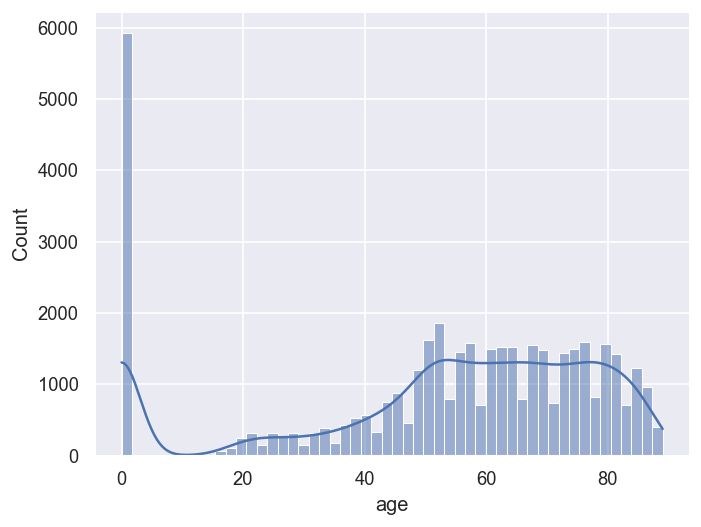

In [18]:
# Lets look at the distribution of age
sns.histplot(x=cleaned_df['age'], kde=True)

Comment: We have a peak demographic of newborns followed by elderly patients 50 and over.

<Axes: xlabel='ExpiredHospital', ylabel='Count'>

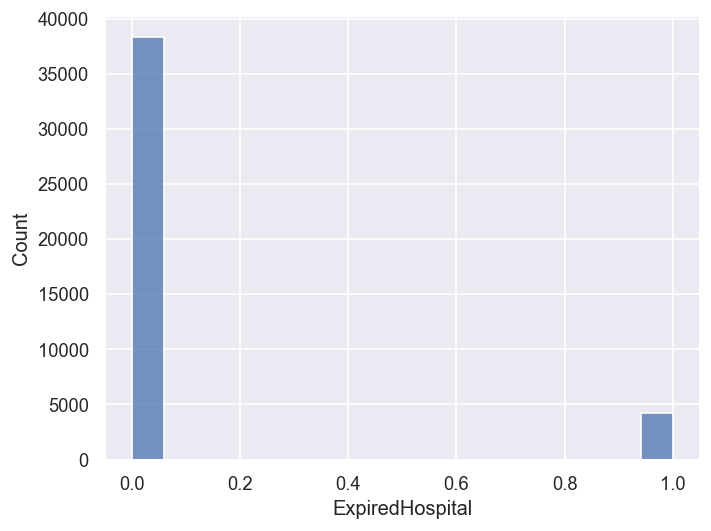

In [19]:
# Lets look at the distribution of deaths
sns.histplot(x=cleaned_df['ExpiredHospital'])

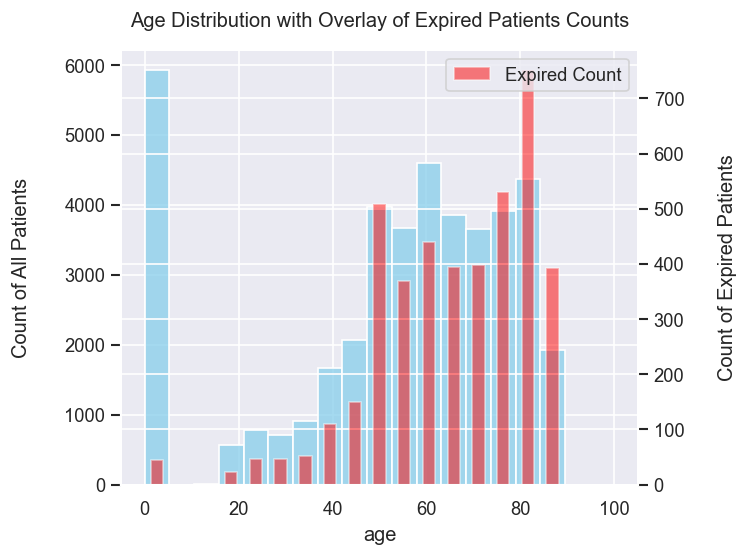

In [20]:
# Lets use a twin axis to plot the number of patients who expired in each age bin on top of 
# the age distribution histogram 


# Determine the number of bins for the histogram
bins = np.linspace(0, 100, 20)  # Example: 20 bins from 0 to 100

# Create the main plot
ax1 = plt.gca()
sns.histplot(cleaned_df['age'], bins=bins, kde=False, label='All Patients', color='skyblue', ax=ax1)

# Label the primary y-axis (left side)
ax1.set_ylabel('Count of All Patients')

# Calculate the count of expired patients in each age bin
expired_counts, _ = np.histogram(cleaned_df.loc[cleaned_df['ExpiredHospital'] == True, 'age'], bins=bins)

# Get the center of each bin to place the counts (expired_counts)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create a twin axis for plotting the counts
ax2 = ax1.twinx()

# Plot the counts for expired patients on the twin axis
ax2.bar(bin_centers, expired_counts, width=np.diff(bins)[0]*0.5, align='center', alpha=0.5, color='red', label='Expired Count')

# Label the secondary y-axis (right side)
ax2.set_ylabel('Count of Expired Patients')

# Set the x-axis label and plot title
plt.xlabel('Age')
plt.title('Age Distribution with Overlay of Expired Patients Counts')
plt.legend(loc='upper right')

# Adjust title and label spacings
plt.title('Age Distribution with Overlay of Expired Patients Counts', y=1.03)  # Adjust the y value as needed
ax1.set_ylabel('Count of All Patients', labelpad=20)  # Adjust the labelpad as needed
ax2.set_ylabel('Count of Expired Patients', labelpad=20)  # Adjust the labelpad as needed

# Make layout tight to avoid overlaps
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\elena\AppData\Local\Temp\ipykernel_19648\3137323982.py:9: RuntimeWarning: invalid value encountered in divide
  death_percentage = (expired_counts / all_counts) * 100


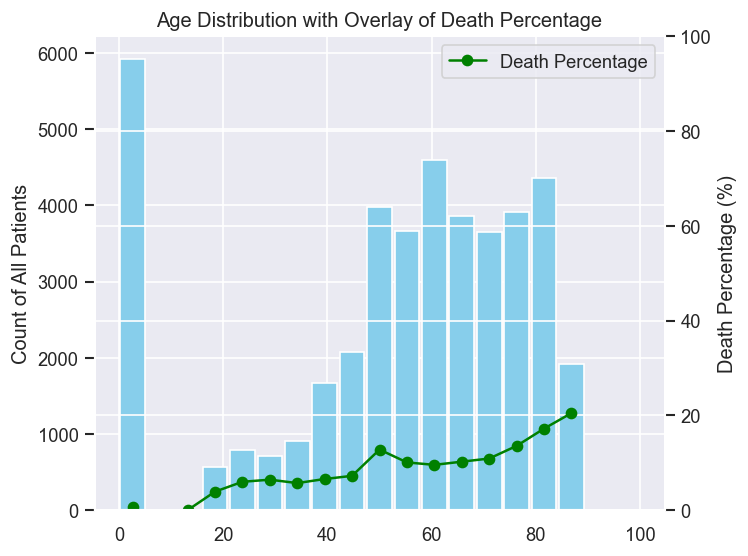

In [21]:
# Determine the number of bins for the histogram
bins = np.linspace(0, 100, 20)  # Adjust this as needed

# Calculate the histogram counts for all patients and expired patients
all_counts, _ = np.histogram(cleaned_df['age'], bins=bins)
expired_counts, _ = np.histogram(cleaned_df.loc[cleaned_df['ExpiredHospital'] == True, 'age'], bins=bins)

# Calculate the percentage of patients who died for each age group
death_percentage = (expired_counts / all_counts) * 100
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create the main plot for all patients
ax1 = plt.gca()
ax1.bar(bin_centers, all_counts, width=np.diff(bins)[0]*0.9, align='center', color='skyblue', label='All Patients')

# Label the primary y-axis (left side)
ax1.set_ylabel('Count of All Patients')

# Create a twin axis for plotting the death percentage
ax2 = ax1.twinx()
ax2.plot(bin_centers, death_percentage, marker='o', color='green', label='Death Percentage')

# Label the secondary y-axis (right side)
ax2.set_ylabel('Death Percentage (%)')
ax2.set_ylim(0, 100)  # This ensures that the y-axis displays from 0% to 100%

# Set the x-axis label and plot title
plt.xlabel('Age')
plt.title('Age Distribution with Overlay of Death Percentage')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

Comment: There seems to be a positive trend between age and death

<h1>Classification</h1>

Our primary objective is to create a model that is able to predict whether a patient will expire or not.

<h2>Decision Tree Classification</h2>

<h3>Data Understanding</h3>

In [22]:
# The dataset we'll be using is our cleaned dataframe

# Our columns/features
print("Columns:")
print(cleaned_df.columns)

# Data type for each column/feature
print("Data Types:")
print(cleaned_df.dtypes)

# Head of our dataset
cleaned_df.head()

Columns:
Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'ethnicity', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'AdmitProcedure', 'NumCPTevents',
       'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract'],
      dtype='object')
Data Types:
gender               object
age                 float64
LOSdays               int64
admit_type            int64
admit_location       object
AdmitDiagnosis       object
insurance             int64
ethnicity            object
NumCallouts         float64
NumDiagnosis          int64
NumProcs              int64
AdmitProcedure       object
NumCPTevents          int64
NumInput              int64
NumLabs               int64
NumMicroLabs          int64
NumNotes              int64
NumOutput             int64
NumRx                 int64
NumProcEvents         int64
NumTransfe

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,ethnicity,NumCallouts,NumDiagnosis,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,WHITE,1.0,16,...,43,4,0,5,15,7,4,399,0,494
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,WHITE,1.0,9,...,56,5,6,5,7,4,5,373,0,466
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,WHITE,3.0,5,...,32,5,1,9,12,0,7,526,0,603
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,WHITE,0.0,18,...,51,3,2,16,25,14,10,555,0,680
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,WHITE,1.0,5,...,31,0,0,8,9,5,4,449,0,509


<h4>Encoding our data</h4>

In [23]:
# We will have to encode our categorical columns/features (aka the strings) 
# before we can fit a model to our dataset

Based on our categorical data, we apply our encoding logic to each column/feature:

- gender: Nominal. It can be one-hot encoded.
- admit_location: Nominal. It’s better to use one-hot encoding.
- AdmitDiagnosis: Nominal, likely with many unique values. One-hot encoding might result in a large number of columns, but it’s still a suitable option.
- ethnicity: Nominal. One-hot encoding is suitable.
- AdmitProcedure: Nominal and possibly with many unique values. Similar to AdmitDiagnosis, one-hot encoding might increase dimensionality but it's suitable.

Good primer on Encoding: https://youtu.be/589nCGeWG1w?si=TZZ4AeRV_M0g9J5y

In [24]:
# Lets have a peek at our AdmitDiagnosis and AdmitProcedure unique values to get an idea of what dimensionality
# to expect from One-Hot Encoding

# AdmitDiagnosis value counts
value_counts_AdmitDiagnosis = cleaned_df['AdmitDiagnosis'].value_counts()
print("Value count for AdmitDiagnosis:")
print(value_counts_AdmitDiagnosis)

# AdmitProecdure value counts
value_counts_AdmitProecdure = cleaned_df['AdmitProcedure'].value_counts()
print("Value count for AdmitProcedure:")
print(value_counts_AdmitProecdure)

Value count for AdmitDiagnosis:
NEWBORN                                       5708
PNEUMONIA                                     1129
SEPSIS                                         866
CONGESTIVE HEART FAILURE                       691
CORONARY ARTERY DISEASE                        606
                                              ... 
LEFT CEREBELLUM MASS/SDA                         1
METASTATIC CANCER;BACK PAIN                      1
MR\MITRAL VALVE REPLACEMENT, L-VAD BACK-UP       1
RESPITORY FAILURE;ACUTE KIDNEY INJURY            1
ROOT ABSCESS                                     1
Name: AdmitDiagnosis, Length: 11949, dtype: int64
Value count for AdmitProcedure:
na                          5827
Cont inv mec ven <96 hrs    2403
Vaccination NEC             1948
Venous cath NEC             1408
Insert endotracheal tube    1343
                            ... 
Partial ureterectomy           1
Proximal pancreatectomy        1
Opn bil ind ing hern NEC       1
Part substern thyroidect    

In [25]:
# Due to high dimensionality for AdmitDiagnosis and AdmitProcedure, 
# we will apply Target Encoding to these two columns/features.
# Meanwhile we will use One-Hot Encoding for our remaining columns/features

In [26]:
import category_encoders as ce                     # For target encoding
from sklearn.preprocessing import OneHotEncoder    # One hot encoding
from sklearn.compose import ColumnTransformer      # For preprocessing subsets of our columns/features

# Initialise OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Columns to one-hot encode
columns_to_onehot_encode = ['gender', 'admit_location', 'ethnicity']

# Applying ColumnTransformer to apply the one-hot encoding to specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, columns_to_onehot_encode)],
    remainder='passthrough'
)

# Fitting and transforming the DataFrame for one-hot encoding
df_onehot_encoded = preprocessor.fit_transform(cleaned_df)
columns_after_onehot = preprocessor.get_feature_names_out(input_features=cleaned_df.columns)
df_onehot_encoded = pd.DataFrame(df_onehot_encoded, columns=columns_after_onehot.tolist())

# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=['AdmitDiagnosis', 'AdmitProcedure'])

# Fitting and transforming the DataFrame for target encoding
df_target_encoded = target_encoder.fit_transform(cleaned_df[['AdmitDiagnosis', 'AdmitProcedure']], cleaned_df['ExpiredHospital'])

# Concatenating all dataframes
encoded_cleaned_df = pd.concat([df_onehot_encoded, df_target_encoded, cleaned_df.drop(columns=columns_to_onehot_encode + ['AdmitDiagnosis', 'AdmitProcedure'])], axis=1)

# Now that we have encoded our categorical/string values, lets have a peek at our encoded dataframe
print("Columns: ")
print(encoded_cleaned_df.columns)

print("Shape of encoded dataset: ")
print(encoded_cleaned_df.shape)

print("Shape of cleaned dataset PRIOR to encoding: ")
print(cleaned_df.shape)

print("Dtypes: ")
print(encoded_cleaned_df.dtypes)

print("Head: ")
encoded_cleaned_df.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Columns: 
Index(['onehot__gender_M', 'onehot__admit_location_CLINIC REFERRAL/PREMATURE',
       'onehot__admit_location_EMERGENCY ROOM ADMIT',
       'onehot__admit_location_HMO REFERRAL/SICK',
       'onehot__admit_location_PHYS REFERRAL/NORMAL DELI',
       'onehot__admit_location_TRANSFER FROM HOSP/EXTRAM',
       'onehot__admit_location_TRANSFER FROM OTHER HEALT',
       'onehot__admit_location_TRANSFER FROM SKILLED NUR',
       'onehot__admit_location_TRSF WITHIN THIS FACILITY',
       'onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'onehot__ethnicity_ASIAN', 'onehot__ethnicity_ASIAN - ASIAN INDIAN',
       'onehot__ethnicity_ASIAN - CAMBODIAN',
       'onehot__ethnicity_ASIAN - CHINESE',
       'onehot__ethnicity_ASIAN - FILIPINO',
       'onehot__ethnicity_ASIAN - JAPANESE',
       'onehot__ethnicity_ASIAN - KOREAN', 'onehot__ethnicity_ASIAN - OTHER',
       'onehot__ethnicity_ASIAN - THAI',
       'onehot__ethnicity_ASIAN - VIETNAMESE',
    

,onehot__gender_M,onehot__admit_location_CLINIC REFERRAL/PREMATURE,onehot__admit_location_EMERGENCY ROOM ADMIT,onehot__admit_location_HMO REFERRAL/SICK,onehot__admit_location_PHYS REFERRAL/NORMAL DELI,onehot__admit_location_TRANSFER FROM HOSP/EXTRAM,onehot__admit_location_TRANSFER FROM OTHER HEALT,onehot__admit_location_TRANSFER FROM SKILLED NUR,onehot__admit_location_TRSF WITHIN THIS FACILITY,onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,4.0,0.0,5.0,15.0,7.0,4.0,399.0,0.0,494.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,5.0,6.0,5.0,7.0,4.0,5.0,373.0,0.0,466.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,5.0,1.0,9.0,12.0,0.0,7.0,526.0,0.0,603.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,51.0,3.0,2.0,16.0,25.0,14.0,10.0,555.0,0.0,680.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,31.0,0.0,0.0,8.0,9.0,5.0,4.0,449.0,0.0,509.0


In [27]:
# Looking for non numerical values that were not encoded properly:

# This function will check each column to see if it has any non-numeric data
def check_for_strings(df):
    for column in df.columns:
        # Check if the data type of the column is object, which typically indicates string data
        if df[column].dtype == 'object':
            print(f"Column '{column}' contains non-numeric data.")
            
# Calling the function on your DataFrame
check_for_strings(encoded_cleaned_df)


Column 'onehot__gender_M' contains non-numeric data.
Column 'onehot__admit_location_CLINIC REFERRAL/PREMATURE' contains non-numeric data.
Column 'onehot__admit_location_EMERGENCY ROOM ADMIT' contains non-numeric data.
Column 'onehot__admit_location_HMO REFERRAL/SICK' contains non-numeric data.
Column 'onehot__admit_location_PHYS REFERRAL/NORMAL DELI' contains non-numeric data.
Column 'onehot__admit_location_TRANSFER FROM HOSP/EXTRAM' contains non-numeric data.
Column 'onehot__admit_location_TRANSFER FROM OTHER HEALT' contains non-numeric data.
Column 'onehot__admit_location_TRANSFER FROM SKILLED NUR' contains non-numeric data.
Column 'onehot__admit_location_TRSF WITHIN THIS FACILITY' contains non-numeric data.
Column 'onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE' contains non-numeric data.
Column 'onehot__ethnicity_ASIAN' contains non-numeric data.
Column 'onehot__ethnicity_ASIAN - ASIAN INDIAN' contains non-numeric data.
Column 'onehot__ethnicity_ASIAN - 

In [28]:
# After observing the tail of the dataframe and noticing the presence of NaN values, that is likely
# the source of our encoding issue

# So lets fix that Nan values!

# Handling NaN values by filling them with zero
encoded_cleaned_df.fillna(0, inplace=True)

# Ensuring all columns are of numeric data type
encoded_cleaned_df = encoded_cleaned_df.apply(pd.to_numeric, errors='ignore')

# Dropping the non-encoded columns
encoded_cleaned_df.drop(columns=['remainder__AdmitDiagnosis', 'remainder__AdmitProcedure'], inplace=True)

# Running the check_for_strings function again to see if there are still non-numeric columns
check_for_strings(encoded_cleaned_df)

In [29]:
# Lets split our dataset 

# Sklearn has a function for splitting datasets
from sklearn.model_selection import train_test_split

# Features that we will give
X = encoded_cleaned_df.drop(columns=['ExpiredHospital'])  # Dropping the target column

# Target value - In this case it will be ExpiredHospital
Y = encoded_cleaned_df["ExpiredHospital"]

# Using sklearn function to split our dataset based on above parameters
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)


In [30]:
# Training a decision tree model

# We will use the Sklearn Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Creating an instance of the DT model
decisionTreeClassifier = DecisionTreeClassifier()

# Fitting our DT model into our training data
decisionTreeClassifier = decisionTreeClassifier.fit(X_train, Y_train)

In [31]:
# Measuring the performance of our Decision Tree Model

In [32]:
# Measuring accuracy - Percentage of correct predictions
from sklearn.metrics import accuracy_score

# Making predictions on the test data
y_pred = decisionTreeClassifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9326455129452988


<h3>DT on Kaggle</h3>

In [33]:
# First lets get our Kaggle

# Assign our Kaggle/Submission dataset to the datafram kaggle_set
kaggle_set = pd.read_csv("Assignment3-Unknown-Dataset.csv")

# Peek at data
kaggle_set.head()

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,LOSgroupNum
0,F,48.0,12,1,EMERGENCY ROOM ADMIT,COPD FLARE,3,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,...,33,4,2,4,6,0,4,286,344,NaN
1,M,55.0,6,1,CLINIC REFERRAL/PREMATURE,PNEUMONIA,2,PROTESTANT QUAKER,SINGLE,WHITE,...,34,5,1,17,10,7,3,1221,1316,NaN
2,M,NaN,6,0,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,2,NOT SPECIFIED,MARRIED,UNKNOWN/NOT SPECIFIED,...,36,2,1,6,17,13,4,214,295,NaN
3,M,0.0,3,2,PHYS REFERRAL/NORMAL DELI,NEWBORN,3,JEWISH,NaN,WHITE,...,0,0,4,0,0,0,6,323,347,NaN
4,F,0.0,15,2,CLINIC REFERRAL/PREMATURE,NEWBORN,3,NOT SPECIFIED,NaN,WHITE,...,2,1,4,0,0,0,4,445,461,NaN


In [34]:
# Dropping the columns 
kaggle_set_DroppedColumns = kaggle_set[['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 
       #'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'TotalNumInteract', 
       #'LOSgroupNum'
       ]].copy()

In [35]:
# Null values in our dataset
kaggle_set_DroppedColumns.isna().sum()

gender                0
age                 609
LOSdays               0
admit_type            0
admit_location        0
AdmitDiagnosis        5
insurance             0
ethnicity             0
NumCallouts         578
NumDiagnosis          0
NumProcs              0
AdmitProcedure        0
NumCPTevents          0
NumInput              0
NumLabs               0
NumMicroLabs          0
NumNotes              0
NumOutput             0
NumRx                 0
NumProcEvents         0
NumTransfers          0
NumChartEvents        0
TotalNumInteract      0
dtype: int64

In [36]:
# Lets leave the missing values there for now [Edit: DT does not like Nan]

# Let convert Nan values 

# Handling NaN values in 'age' column by replacing with 0
kaggle_set_DroppedColumns['age'].fillna(0, inplace=True)

# Handling NaN values in 'AdmitDiagnosis' column by replacing with 'Unknown'
kaggle_set_DroppedColumns['AdmitDiagnosis'].fillna('Unknown', inplace=True)

# Handling NaN values in 'NumCallouts' column by replacing with 0
kaggle_set_DroppedColumns['NumCallouts'].fillna(0, inplace=True)

# Just to ensure that there are no more NaN values left
print(kaggle_set_DroppedColumns.isna().sum())


gender              0
age                 0
LOSdays             0
admit_type          0
admit_location      0
AdmitDiagnosis      0
insurance           0
ethnicity           0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
AdmitProcedure      0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumNotes            0
NumOutput           0
NumRx               0
NumProcEvents       0
NumTransfers        0
NumChartEvents      0
TotalNumInteract    0
dtype: int64


In [37]:
# Lets encode our kaggle set (kaggle_set_DroppedColumns)

# When fitting the preprocessor ensure you're using only the feature columns
feature_columns = cleaned_df.drop(columns=['ExpiredHospital'])
preprocessor.fit(feature_columns)

# OneHotEncoding using the fitted preprocessor
kaggle_onehot_encoded = preprocessor.transform(kaggle_set_DroppedColumns)  
columns_after_onehot = preprocessor.get_feature_names_out(input_features=kaggle_set_DroppedColumns.columns)
kaggle_onehot_encoded = pd.DataFrame(kaggle_onehot_encoded, columns=columns_after_onehot.tolist())

# TargetEncoding using the already fitted target_encoder (only transform, don't fit again)
kaggle_target_encoded = target_encoder.transform(kaggle_set_DroppedColumns[['AdmitDiagnosis', 'AdmitProcedure']])

# Concatenating all dataframes
encoded_kaggle_df = pd.concat([kaggle_onehot_encoded, kaggle_target_encoded, kaggle_set_DroppedColumns.drop(columns=columns_to_onehot_encode + ['AdmitDiagnosis', 'AdmitProcedure'])], axis=1)

# Displaying some information about the encoded Kaggle dataset
print("Columns: ")
print(encoded_kaggle_df.columns)

print("Shape of encoded Kaggle dataset: ")
print(encoded_kaggle_df.shape)

print("Dtypes: ")
print(encoded_kaggle_df.dtypes)

print("Head: ")
encoded_kaggle_df.head()

Columns: 
Index(['onehot__gender_M', 'onehot__admit_location_CLINIC REFERRAL/PREMATURE',
       'onehot__admit_location_EMERGENCY ROOM ADMIT',
       'onehot__admit_location_HMO REFERRAL/SICK',
       'onehot__admit_location_PHYS REFERRAL/NORMAL DELI',
       'onehot__admit_location_TRANSFER FROM HOSP/EXTRAM',
       'onehot__admit_location_TRANSFER FROM OTHER HEALT',
       'onehot__admit_location_TRANSFER FROM SKILLED NUR',
       'onehot__admit_location_TRSF WITHIN THIS FACILITY',
       'onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'onehot__ethnicity_ASIAN', 'onehot__ethnicity_ASIAN - ASIAN INDIAN',
       'onehot__ethnicity_ASIAN - CAMBODIAN',
       'onehot__ethnicity_ASIAN - CHINESE',
       'onehot__ethnicity_ASIAN - FILIPINO',
       'onehot__ethnicity_ASIAN - JAPANESE',
       'onehot__ethnicity_ASIAN - KOREAN', 'onehot__ethnicity_ASIAN - OTHER',
       'onehot__ethnicity_ASIAN - THAI',
       'onehot__ethnicity_ASIAN - VIETNAMESE',
    

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,onehot__gender_M,onehot__admit_location_CLINIC REFERRAL/PREMATURE,onehot__admit_location_EMERGENCY ROOM ADMIT,onehot__admit_location_HMO REFERRAL/SICK,onehot__admit_location_PHYS REFERRAL/NORMAL DELI,onehot__admit_location_TRANSFER FROM HOSP/EXTRAM,onehot__admit_location_TRANSFER FROM OTHER HEALT,onehot__admit_location_TRANSFER FROM SKILLED NUR,onehot__admit_location_TRSF WITHIN THIS FACILITY,onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,33,4,2,4,6,0,4,286,344
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,34,5,1,17,10,7,3,1221,1316
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,36,2,1,6,17,13,4,214,295
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,0,4,0,0,0,6,323,347
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,2,1,4,0,0,0,4,445,461


In [38]:
# 1. Remove 'ExpiredHospital' from both datasets
encoded_kaggle_df = encoded_kaggle_df.drop(columns=['ExpiredHospital'], errors='ignore')
encoded_cleaned_df = encoded_cleaned_df.drop(columns=['ExpiredHospital'], errors='ignore')

# 2. Align columns of encoded_kaggle_df to match encoded_cleaned_df
missing_cols = set(encoded_cleaned_df.columns) - set(encoded_kaggle_df.columns)
for col in missing_cols:
    encoded_kaggle_df[col] = 0
encoded_kaggle_df = encoded_kaggle_df[encoded_cleaned_df.columns]

# 3. Generate predictions and cast to integer
predictions = decisionTreeClassifier.predict(encoded_kaggle_df).astype(int)

# 4. Format predictions with row IDs

# Generate 'row ID' based on the index
row_ids = ['Row' + str(i) for i in kaggle_set_DroppedColumns.index]

output_df = pd.DataFrame({
    'row ID': row_ids,
    'Predicted-ExpiredHospital': predictions
})

# 5. Display and save the output
print(output_df)
output_df.to_csv('DT_prediction.csv', index=False)

         row ID  Predicted-ExpiredHospital
0          Row0                          0
1          Row1                          0
2          Row2                          0
3          Row3                          0
4          Row4                          0
...         ...                        ...
11791  Row11791                          0
11792  Row11792                          0
11793  Row11793                          0
11794  Row11794                          0
11795  Row11795                          0

[11796 rows x 2 columns]


Description for prediction.csv w/ DT:

Prediction using our DT classifier where the following columns were dropped from our training set:
['religion', 'marital_status', 'LOSgroupNum']

The following columns had One Hot Encoding applied to them:
['gender', 'admit_location', 'ethnicity']

The following columns had Target Encoding applied to them:
['AdmitDiagnosis', 'AdmitProcedure']

<h2>K-Nearest Neighbours (KNN) Classification</h2>

In [39]:
# KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Splitting dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Scaling data to avoid skewing
from sklearn.preprocessing import StandardScaler

# Testing performance of model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [40]:
# Quick recap on the nature of our cleaned training set
# The dataset we'll be using is our cleaned dataframe

# Our columns/features
print("Columns:")
print(cleaned_df.columns)
print("\n")

# Data type for each column/feature
print("Data Types:")
print(cleaned_df.dtypes)
print("\n")

# NA count
print("NA Count:")
print(cleaning_df.isna().sum())
print("\n")

# Summary stats
print("Summary stats:")
print(cleaned_df.describe())
print("\n")

# Shape
print("Shape of dataset:")
print(cleaned_df.shape)
print("\n")

# Head of our dataset
cleaned_df.head()

Columns:
Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'ethnicity', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'AdmitProcedure', 'NumCPTevents',
       'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract'],
      dtype='object')


Data Types:
gender               object
age                 float64
LOSdays               int64
admit_type            int64
admit_location       object
AdmitDiagnosis       object
insurance             int64
ethnicity            object
NumCallouts         float64
NumDiagnosis          int64
NumProcs              int64
AdmitProcedure       object
NumCPTevents          int64
NumInput              int64
NumLabs               int64
NumMicroLabs          int64
NumNotes              int64
NumOutput             int64
NumRx                 int64
NumProcEvents         int64
NumTrans

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,ethnicity,NumCallouts,NumDiagnosis,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,WHITE,1.0,16,...,43,4,0,5,15,7,4,399,0,494
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,WHITE,1.0,9,...,56,5,6,5,7,4,5,373,0,466
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,WHITE,3.0,5,...,32,5,1,9,12,0,7,526,0,603
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,WHITE,0.0,18,...,51,3,2,16,25,14,10,555,0,680
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,WHITE,1.0,5,...,31,0,0,8,9,5,4,449,0,509


In [41]:
# Figuring out how to split our data PROPERLY
cleaned_df.iloc[:, 0:24]

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,ethnicity,NumCallouts,NumDiagnosis,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,WHITE,1.0,16,...,43,4,0,5,15,7,4,399,0,494
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,WHITE,1.0,9,...,56,5,6,5,7,4,5,373,0,466
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,WHITE,3.0,5,...,32,5,1,9,12,0,7,526,0,603
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,WHITE,0.0,18,...,51,3,2,16,25,14,10,555,0,680
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,WHITE,1.0,5,...,31,0,0,8,9,5,4,449,0,509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,M,74.0,36,0,PHYS REFERRAL/NORMAL DELI,RECTAL CANCER/SDA,2,WHITE,0.0,9,...,21,30,1,2,3,0,6,57,0,89
47176,F,85.0,3,1,TRANSFER FROM HOSP/EXTRAM,BRADYCARDIA,2,WHITE,1.0,16,...,51,8,1,5,14,3,4,358,0,447
47177,M,60.0,25,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,UNKNOWN/NOT SPECIFIED,0.0,9,...,67,5,3,23,8,0,2,1315,0,1746
47178,M,23.0,17,1,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,3,WHITE,0.0,10,...,27,9,2,6,6,0,6,207,0,261


In [42]:
# Our target column is second last, so lets swap it so its easier for us to do the splitting

# Get a list of column names
columns = cleaned_df.columns.tolist()

# Swap the positions of columns 23 and 24
columns[22], columns[23] = columns[23], columns[22]

# Reorder the DataFrame columns
cleaned_dfReordered = cleaned_df[columns].copy()

# cleaned_dfReordered is our cleaned dataframe where the target variable is last
cleaned_dfReordered.iloc[:, 0:24]

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,ethnicity,NumCallouts,NumDiagnosis,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,ExpiredHospital
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,WHITE,1.0,16,...,43,4,0,5,15,7,4,399,494,0
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,WHITE,1.0,9,...,56,5,6,5,7,4,5,373,466,0
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,WHITE,3.0,5,...,32,5,1,9,12,0,7,526,603,0
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,WHITE,0.0,18,...,51,3,2,16,25,14,10,555,680,0
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,WHITE,1.0,5,...,31,0,0,8,9,5,4,449,509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,M,74.0,36,0,PHYS REFERRAL/NORMAL DELI,RECTAL CANCER/SDA,2,WHITE,0.0,9,...,21,30,1,2,3,0,6,57,89,0
47176,F,85.0,3,1,TRANSFER FROM HOSP/EXTRAM,BRADYCARDIA,2,WHITE,1.0,16,...,51,8,1,5,14,3,4,358,447,0
47177,M,60.0,25,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,UNKNOWN/NOT SPECIFIED,0.0,9,...,67,5,3,23,8,0,2,1315,1746,0
47178,M,23.0,17,1,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,3,WHITE,0.0,10,...,27,9,2,6,6,0,6,207,261,0


In [43]:
# So to demonstrate, we want everything but the target variable, selecting that would be
cleaned_dfReordered.iloc[:, 0:23]

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,ethnicity,NumCallouts,NumDiagnosis,...,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,WHITE,1.0,16,...,25,43,4,0,5,15,7,4,399,494
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,WHITE,1.0,9,...,14,56,5,6,5,7,4,5,373,466
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,WHITE,3.0,5,...,20,32,5,1,9,12,0,7,526,603
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,WHITE,0.0,18,...,20,51,3,2,16,25,14,10,555,680
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,WHITE,1.0,5,...,7,31,0,0,8,9,5,4,449,509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,M,74.0,36,0,PHYS REFERRAL/NORMAL DELI,RECTAL CANCER/SDA,2,WHITE,0.0,9,...,4,21,30,1,2,3,0,6,57,89
47176,F,85.0,3,1,TRANSFER FROM HOSP/EXTRAM,BRADYCARDIA,2,WHITE,1.0,16,...,7,51,8,1,5,14,3,4,358,447
47177,M,60.0,25,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,UNKNOWN/NOT SPECIFIED,0.0,9,...,331,67,5,3,23,8,0,2,1315,1746
47178,M,23.0,17,1,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,3,WHITE,0.0,10,...,13,27,9,2,6,6,0,6,207,261


In [44]:
# Then selecting ONLY the target variable would be
cleaned_dfReordered.iloc[:, 23]

0        0
1        0
2        0
3        0
4        0
        ..
47175    0
47176    0
47177    0
47178    0
47179    0
Name: ExpiredHospital, Length: 42594, dtype: int64

In [45]:
# Encoding - We'll use the same encoding code from our DT

import category_encoders as ce                     # For target encoding
from sklearn.preprocessing import OneHotEncoder    # One hot encoding
from sklearn.compose import ColumnTransformer      # For preprocessing subsets of our columns/features

# Initialise OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Columns to one-hot encode
columns_to_onehot_encode = ['gender', 'admit_location', 'ethnicity']

# Applying ColumnTransformer to apply the one-hot encoding to specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, columns_to_onehot_encode)],
    remainder='passthrough'
)

# Fitting and transforming the DataFrame for one-hot encoding
df_onehot_encoded = preprocessor.fit_transform(cleaned_dfReordered)
columns_after_onehot = preprocessor.get_feature_names_out(input_features=cleaned_dfReordered.columns)
df_onehot_encoded = pd.DataFrame(df_onehot_encoded, columns=columns_after_onehot.tolist())

# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=['AdmitDiagnosis', 'AdmitProcedure'])

# Fitting and transforming the DataFrame for target encoding
df_target_encoded = target_encoder.fit_transform(cleaned_dfReordered[['AdmitDiagnosis', 'AdmitProcedure']], cleaned_dfReordered['ExpiredHospital'])

# Concatenating all dataframes
encoded_cleaned_df = pd.concat([df_onehot_encoded, df_target_encoded, cleaned_dfReordered.drop(columns=columns_to_onehot_encode + ['AdmitDiagnosis', 'AdmitProcedure'])], axis=1)

# Now that we have encoded our categorical/string values, lets have a peek at our encoded dataframe
print("Columns: ")
print(encoded_cleaned_df.columns)

print("Shape of encoded dataset: ")
print(encoded_cleaned_df.shape)

print("Shape of cleaned dataset PRIOR to encoding: ")
print(cleaned_df.shape)

print("Dtypes: ")
print(encoded_cleaned_df.dtypes)

print("Head: ")
encoded_cleaned_df.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Columns: 
Index(['onehot__gender_M', 'onehot__admit_location_CLINIC REFERRAL/PREMATURE',
       'onehot__admit_location_EMERGENCY ROOM ADMIT',
       'onehot__admit_location_HMO REFERRAL/SICK',
       'onehot__admit_location_PHYS REFERRAL/NORMAL DELI',
       'onehot__admit_location_TRANSFER FROM HOSP/EXTRAM',
       'onehot__admit_location_TRANSFER FROM OTHER HEALT',
       'onehot__admit_location_TRANSFER FROM SKILLED NUR',
       'onehot__admit_location_TRSF WITHIN THIS FACILITY',
       'onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'onehot__ethnicity_ASIAN', 'onehot__ethnicity_ASIAN - ASIAN INDIAN',
       'onehot__ethnicity_ASIAN - CAMBODIAN',
       'onehot__ethnicity_ASIAN - CHINESE',
       'onehot__ethnicity_ASIAN - FILIPINO',
       'onehot__ethnicity_ASIAN - JAPANESE',
       'onehot__ethnicity_ASIAN - KOREAN', 'onehot__ethnicity_ASIAN - OTHER',
       'onehot__ethnicity_ASIAN - THAI',
       'onehot__ethnicity_ASIAN - VIETNAMESE',
    

,onehot__gender_M,onehot__admit_location_CLINIC REFERRAL/PREMATURE,onehot__admit_location_EMERGENCY ROOM ADMIT,onehot__admit_location_HMO REFERRAL/SICK,onehot__admit_location_PHYS REFERRAL/NORMAL DELI,onehot__admit_location_TRANSFER FROM HOSP/EXTRAM,onehot__admit_location_TRANSFER FROM OTHER HEALT,onehot__admit_location_TRANSFER FROM SKILLED NUR,onehot__admit_location_TRSF WITHIN THIS FACILITY,onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,ExpiredHospital
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,4.0,0.0,5.0,15.0,7.0,4.0,399.0,494.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,5.0,6.0,5.0,7.0,4.0,5.0,373.0,466.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,5.0,1.0,9.0,12.0,0.0,7.0,526.0,603.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,51.0,3.0,2.0,16.0,25.0,14.0,10.0,555.0,680.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,31.0,0.0,0.0,8.0,9.0,5.0,4.0,449.0,509.0,0.0


In [46]:
# Looking for non numerical values that were not encoded properly:

# This function will check each column to see if it has any non-numeric data
def check_for_strings(df):
    for column in df.columns:
        # Check if the data type of the column is object, which typically indicates string data
        if df[column].dtype == 'object':
            print(f"Column '{column}' contains non-numeric data.")
            
# Calling the function on your DataFrame
check_for_strings(encoded_cleaned_df)

Column 'onehot__gender_M' contains non-numeric data.
Column 'onehot__admit_location_CLINIC REFERRAL/PREMATURE' contains non-numeric data.
Column 'onehot__admit_location_EMERGENCY ROOM ADMIT' contains non-numeric data.
Column 'onehot__admit_location_HMO REFERRAL/SICK' contains non-numeric data.
Column 'onehot__admit_location_PHYS REFERRAL/NORMAL DELI' contains non-numeric data.
Column 'onehot__admit_location_TRANSFER FROM HOSP/EXTRAM' contains non-numeric data.
Column 'onehot__admit_location_TRANSFER FROM OTHER HEALT' contains non-numeric data.
Column 'onehot__admit_location_TRANSFER FROM SKILLED NUR' contains non-numeric data.
Column 'onehot__admit_location_TRSF WITHIN THIS FACILITY' contains non-numeric data.
Column 'onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE' contains non-numeric data.
Column 'onehot__ethnicity_ASIAN' contains non-numeric data.
Column 'onehot__ethnicity_ASIAN - ASIAN INDIAN' contains non-numeric data.
Column 'onehot__ethnicity_ASIAN - 

In [47]:
# After observing the tail of the dataframe and noticing the presence of NaN values, that is likely
# the source of our encoding issue

# So lets fix that Nan values!

# Handling NaN values by filling them with zero
encoded_cleaned_df.fillna(0, inplace=True)

# Ensuring all columns are of numeric data type
encoded_cleaned_df = encoded_cleaned_df.apply(pd.to_numeric, errors='ignore')

# Dropping the non-encoded columns
encoded_cleaned_df.drop(columns=['remainder__AdmitDiagnosis', 'remainder__AdmitProcedure'], inplace=True)

# Running the check_for_strings function again to see if there are still non-numeric columns
check_for_strings(encoded_cleaned_df)

In [48]:
encoded_cleaned_df.head()

,onehot__gender_M,onehot__admit_location_CLINIC REFERRAL/PREMATURE,onehot__admit_location_EMERGENCY ROOM ADMIT,onehot__admit_location_HMO REFERRAL/SICK,onehot__admit_location_PHYS REFERRAL/NORMAL DELI,onehot__admit_location_TRANSFER FROM HOSP/EXTRAM,onehot__admit_location_TRANSFER FROM OTHER HEALT,onehot__admit_location_TRANSFER FROM SKILLED NUR,onehot__admit_location_TRSF WITHIN THIS FACILITY,onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,ExpiredHospital
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,4.0,0.0,5.0,15.0,7.0,4.0,399.0,494.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,5.0,6.0,5.0,7.0,4.0,5.0,373.0,466.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,5.0,1.0,9.0,12.0,0.0,7.0,526.0,603.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,51.0,3.0,2.0,16.0,25.0,14.0,10.0,555.0,680.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,31.0,0.0,0.0,8.0,9.0,5.0,4.0,449.0,509.0,0.0


In [49]:
# Shape of our encoded df
encoded_cleaned_df.shape

(46699, 89)

In [50]:
# Lets see how to split our encoded df
encoded_cleaned_df.iloc[:, 0:88]

# So 88 goes up to TotalNumInteract

,onehot__gender_M,onehot__admit_location_CLINIC REFERRAL/PREMATURE,onehot__admit_location_EMERGENCY ROOM ADMIT,onehot__admit_location_HMO REFERRAL/SICK,onehot__admit_location_PHYS REFERRAL/NORMAL DELI,onehot__admit_location_TRANSFER FROM HOSP/EXTRAM,onehot__admit_location_TRANSFER FROM OTHER HEALT,onehot__admit_location_TRANSFER FROM SKILLED NUR,onehot__admit_location_TRSF WITHIN THIS FACILITY,onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,43.0,4.0,0.0,5.0,15.0,7.0,4.0,399.0,494.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,56.0,5.0,6.0,5.0,7.0,4.0,5.0,373.0,466.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,32.0,5.0,1.0,9.0,12.0,0.0,7.0,526.0,603.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,20.0,51.0,3.0,2.0,16.0,25.0,14.0,10.0,555.0,680.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,31.0,0.0,0.0,8.0,9.0,5.0,4.0,449.0,509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,21.0,30.0,1.0,2.0,3.0,0.0,6.0,57.0,89.0
47176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,51.0,8.0,1.0,5.0,14.0,3.0,4.0,358.0,447.0
47177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,331.0,67.0,5.0,3.0,23.0,8.0,0.0,2.0,1315.0,1746.0
47178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,27.0,9.0,2.0,6.0,6.0,0.0,6.0,207.0,261.0


In [51]:
encoded_cleaned_df.iloc[:, 0:89]

# 89 is our ExpiredHospital

,onehot__gender_M,onehot__admit_location_CLINIC REFERRAL/PREMATURE,onehot__admit_location_EMERGENCY ROOM ADMIT,onehot__admit_location_HMO REFERRAL/SICK,onehot__admit_location_PHYS REFERRAL/NORMAL DELI,onehot__admit_location_TRANSFER FROM HOSP/EXTRAM,onehot__admit_location_TRANSFER FROM OTHER HEALT,onehot__admit_location_TRANSFER FROM SKILLED NUR,onehot__admit_location_TRSF WITHIN THIS FACILITY,onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,ExpiredHospital
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,4.0,0.0,5.0,15.0,7.0,4.0,399.0,494.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,5.0,6.0,5.0,7.0,4.0,5.0,373.0,466.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,5.0,1.0,9.0,12.0,0.0,7.0,526.0,603.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,51.0,3.0,2.0,16.0,25.0,14.0,10.0,555.0,680.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,31.0,0.0,0.0,8.0,9.0,5.0,4.0,449.0,509.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,30.0,1.0,2.0,3.0,0.0,6.0,57.0,89.0,0.0
47176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,8.0,1.0,5.0,14.0,3.0,4.0,358.0,447.0,0.0
47177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,5.0,3.0,23.0,8.0,0.0,2.0,1315.0,1746.0,0.0
47178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,9.0,2.0,6.0,6.0,0.0,6.0,207.0,261.0,0.0


In [52]:
# So if we only want ExpiredHospital
encoded_cleaned_df.iloc[:, 88]

# 88, index goes wonky for some reason with no starter value

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
47175    0.0
47176    0.0
47177    0.0
47178    0.0
47179    0.0
Name: ExpiredHospital, Length: 46699, dtype: float64

In [53]:
# Splitting the dataset
X = encoded_cleaned_df.iloc[:, 0:88]
y = encoded_cleaned_df.iloc[:, 88]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [54]:
# Length of our split sets
print("Training Set:")
print(len(X_train))
print(len(y_train))
print("Testing Set:")
print(len(X_test))
print(len(y_test))

Training Set:
37359
37359
Testing Set:
9340
9340


In [55]:
column_names = X.columns  # Assuming X is the DataFrame before scaling

In [56]:
# Feature scaling
scalerInstance = StandardScaler()
X_train = scalerInstance.fit_transform(X_train)
X_test = scalerInstance.transform(X_test)

In [57]:
# Define the model: Init K-NN
classifierKNN = KNeighborsClassifier(n_neighbors=11, p=1, metric='minkowski')

In [58]:
# Fit Model
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [59]:
# Predict the test set results
y_pred = classifierKNN.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[8453   29]
 [ 613  245]]
0.43286219081272087


In [61]:
print(accuracy_score(y_test, y_pred))

0.9312633832976446


<h3>KNN on Kaggle</h3>

In [62]:
# Our kaggle set is already encoded, so we just need to scale it
encoded_kaggle_df.head()

,onehot__gender_M,onehot__admit_location_CLINIC REFERRAL/PREMATURE,onehot__admit_location_EMERGENCY ROOM ADMIT,onehot__admit_location_HMO REFERRAL/SICK,onehot__admit_location_PHYS REFERRAL/NORMAL DELI,onehot__admit_location_TRANSFER FROM HOSP/EXTRAM,onehot__admit_location_TRANSFER FROM OTHER HEALT,onehot__admit_location_TRANSFER FROM SKILLED NUR,onehot__admit_location_TRSF WITHIN THIS FACILITY,onehot__ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,33,4,2,4,6,0,4,286,344
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,34,5,1,17,10,7,3,1221,1316
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,36,2,1,6,17,13,4,214,295
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,0,4,0,0,0,6,323,347
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,2,1,4,0,0,0,4,445,461


In [63]:
# Shape of our dataserts
print(encoded_kaggle_df.shape)
print(X_train.shape)  

(11796, 88)
(37359, 88)


In [64]:
# Align column order of kaggle set with our training set
encoded_kaggle_df = encoded_kaggle_df[column_names]

In [65]:
# Scaling our kaggle set
X_new = scalerInstance.transform(encoded_kaggle_df)

In [66]:
# Generate predictions and cast to integer
predictions = classifierKNN.predict(X_new).astype(int)  # Ensure you're using the scaled data

# Format predictions with row IDs

# Generate 'row ID' based on the index
row_ids = ['Row' + str(i) for i in encoded_kaggle_df.index]  # It's okay to use encoded_kaggle_df for index

output_df = pd.DataFrame({
    'row ID': row_ids,
    'Predicted-ExpiredHospital': predictions
})

# Display and save the output
print(output_df)
output_df.to_csv('KNN_prediction.csv', index=False)

         row ID  Predicted-ExpiredHospital
0          Row0                          0
1          Row1                          0
2          Row2                          0
3          Row3                          0
4          Row4                          0
...         ...                        ...
11791  Row11791                          0
11792  Row11792                          0
11793  Row11793                          0
11794  Row11794                          0
11795  Row11795                          0

[11796 rows x 2 columns]


<h2>Ensemble Methods - Random Forest</h2>

In [67]:
# Importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

<h1>Notes to Self</h1>

- Decision Tree had a 90% accuracy on local set but only 69% accuracy in Kaggle set, one reason could be is I did not normalise or scale
  the values for certain columns such as the Labs and other "Num..." columns which may have resulted in overfitting.
  
  <b>Action: Do the Decision Tree again after normalising and scaling these values.</b>

- Decision tree test data had ExpiredHospital (Target variable) in it which may have affected predictions

  <b>Action: Make sure only training set had target variable present as we are predicting it.</b>

- Find out how to optimise KNN parameters

  <b>Action: Find out how to optimise KNN parameters.</b>

- Look into "Grid Search for Hyperparameter Tuning"